In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.cluster import contingency_matrix
import matplotlib._color_data as mcd

In [2]:
#getting a list of colors for the plots
colors = list(mcd.XKCD_COLORS.values())

# Functions

In [3]:
#This function is for the datasets with two features
def plotcluster2D(df, labels, title, size):
    i=0
    fig = plt.figure(figsize=size)
    for l in np.unique(labels):
        #choosing a different color
        dictcolor = {l:colors[i]}
        i+=1
        #grouping dataset in clusters
        current_cluster = df.iloc[labels==l].reset_index(drop=True)
        #plotting
        plt.scatter(current_cluster['x'], current_cluster['y'], label=l, c=dictcolor[l])
    plt.title(title)
    plt.legend(loc=(1,0))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [4]:
#This function is for the datasets with three features
def plotcluster3D(df, labels, title, size):
    fig = plt.figure(figsize=size)
    ax = Axes3D(fig)
    for l in np.unique(labels):
        #grouping dataset in clusters
        current_cluster = df.iloc[labels==l].reset_index(drop=True)
        #plotting
        ax.scatter(current_cluster['x'], current_cluster['y'], current_cluster['z'], label=l)
    plt.legend(loc=(1,0))
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()
    return ax

In [5]:
#function to calculate purity
def purityscore(truelabels, clusterlabels):
    #compute contingency matrix
    contmat = contingency_matrix(truelabels, clusterlabels)
    #finding the number of data points of the most frequent class in each cluster
    purity = np.sum(np.amax(contmat, axis=0))/np.sum(contmat)
    return purity

# Compound Dataset

In [6]:
df1 = pd.read_csv('F://Uni/991/Machine_Learning/ML_991_Final/Dataset/2/Compound.txt', 
                 
                  sep="\s+",
                 header=None,
                 names=['x', 'y', 'class']
)
df1.head()

,x,y,class
0,26.75,22.15,1
1,29.80,22.15,1
2,31.55,21.10,1
3,27.70,20.85,1
4,29.90,19.95,1


In [7]:
print('Unique Class Labels: ', np.unique(df1['class']))

Unique Class Labels:  [1 2 3 4 5 6]


Purity for Compound Dataset:  0.974937343358396


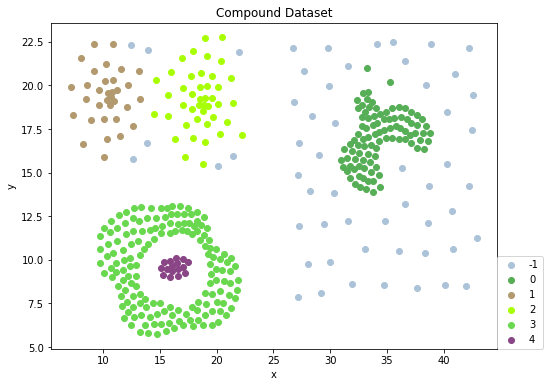

In [8]:
#Using DBSCAN
model1 = DBSCAN(eps = 1.53, min_samples=5).fit(df1.drop(columns=['class']))
labels1 = model1.labels_
print('Purity for Compound Dataset: ', purityscore(df1['class'], labels1))
plotcluster2D(df1,labels1,'Compound Dataset', (8,6))

# D31 Dataset

In [9]:
df2 = pd.read_csv('F://Uni/991/Machine_Learning/ML_991_Final/Dataset/2/D31.txt', 
                 
                  sep="\s+",
                 header=None,
                 names=['x', 'y', 'class']
)
df2.head()

,x,y,class
0,25.0514,5.7475,1
1,26.6614,7.3414,1
2,25.2653,6.2466,1
3,25.2285,4.7447,1
4,25.7529,5.1564,1


In [10]:
print('Unique Class Labels: ', np.unique(df2['class']))

Unique Class Labels:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


Purity for D31 Dataset:  0.9109677419354839


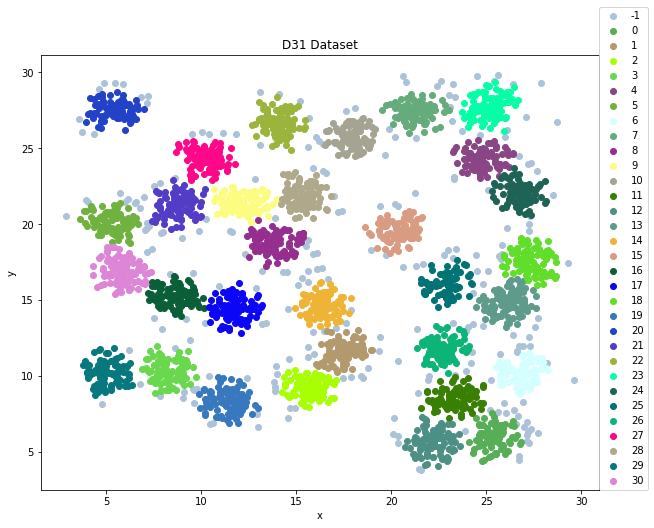

In [11]:
#Using DBSCAN
model2 = DBSCAN(eps = 0.757, min_samples=20).fit(df2.drop(columns=['class']))
labels2 = model2.labels_
print('Purity for D31 Dataset: ', purityscore(df2['class'], labels2))
plotcluster2D(df2, labels2, 'D31 Dataset', (10,8))

# pathbased Dataset

In [12]:
df3 = pd.read_csv('F://Uni/991/Machine_Learning/ML_991_Final/Dataset/2/pathbased.txt', 
                 
                  sep="\s+",
                 header=None,
                 names=['x', 'y', 'class']
)
df3.head()

,x,y,class
0,11.25,5.05,1
1,10.95,4.70,1
2,9.85,5.80,1
3,9.80,5.75,1
4,9.15,6.80,1


In [13]:
print('Unique Class Labels: ', np.unique(df3['class']))

Unique Class Labels:  [1 2 3]


Purity for Pathbased Dataset:  0.96


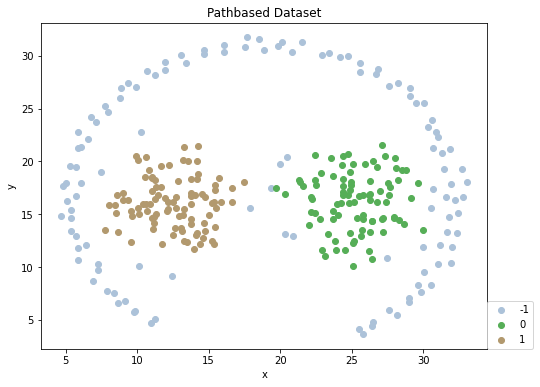

In [14]:
#Using DBSCAN
model3 = DBSCAN(eps = 2, min_samples=10).fit(df3.drop(columns=['class']))
labels3 = model3.labels_
print('Purity for Pathbased Dataset: ', purityscore(df3['class'], labels3))
plotcluster2D(df3, labels3, 'Pathbased Dataset', (8,6))

# rings Dataset

In [15]:
df4 = pd.read_csv('F://Uni/991/Machine_Learning/ML_991_Final/Dataset/2/rings.txt', 
                 
                  sep="\s+",
                 header=None,
                 names=['class', 'x', 'y', 'z']
)
df4.head()

,class,x,y,z
0,1,28.754302,6.011078,50.997220
1,1,80.458213,7.425220,50.907384
2,1,68.533113,62.922355,49.856104
3,1,54.375681,67.387020,50.214917
4,1,74.430772,4.421254,51.687489


In [16]:
print('Unique Class Labels: ', np.unique(df4['class']))

Unique Class Labels:  [1 2]


Purity for Rings Dataset:  1.0


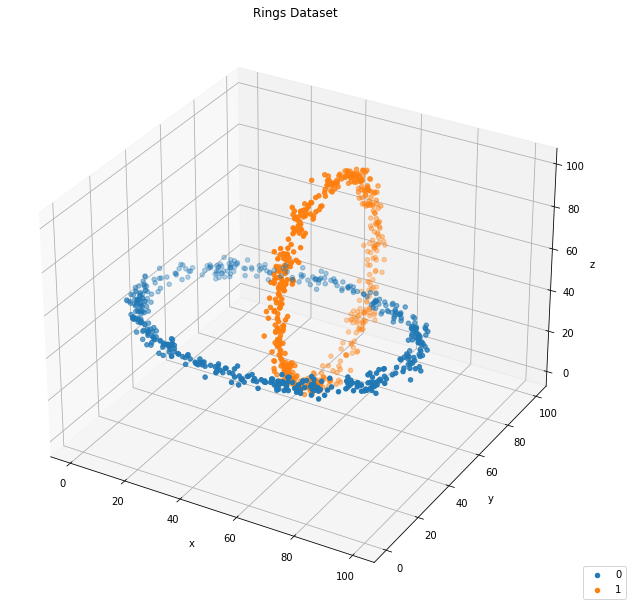

In [17]:
#Using DBSCAN
model4 = DBSCAN(eps = 5, min_samples=8).fit(df4.drop(columns=['class']))
labels4 = model4.labels_
print('Purity for Rings Dataset: ', purityscore(df4['class'], labels4))
plotcluster3D(df4, labels4, 'Rings Dataset', (8,8))

# spiral Dataset

In [18]:
df5 = pd.read_csv('F://Uni/991/Machine_Learning/ML_991_Final/Dataset/2/spiral.txt', 
                 
                  sep="\s+",
                 header=None,
                 names=['x', 'y', 'class']
)
df5.head()

,x,y,class
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [19]:
print('Unique Class Labels: ', np.unique(df5['class']))

Unique Class Labels:  [1 2 3]


Purity for Spiral Dataset:  1.0


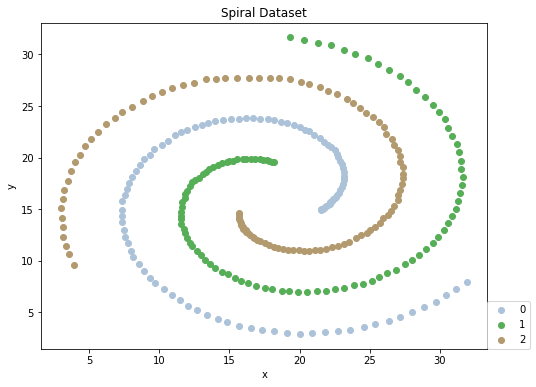

In [20]:
#Using DBSCAN
model5 = DBSCAN(eps = 1.5, min_samples=3).fit(df5.drop(columns=['class']))
labels5 = model5.labels_
print('Purity for Spiral Dataset: ', purityscore(df5['class'], labels5))
plotcluster2D(df5, labels5, 'Spiral Dataset', (8,6))